### 处理数据集

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
#导入数据集
data=pd.read_csv(r"E:\ML\regression\housing.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 1.处理空值行

In [39]:
print(data.isnull().sum())#查找空值行
data=data.dropna(axis=0)#将空值的行删除

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


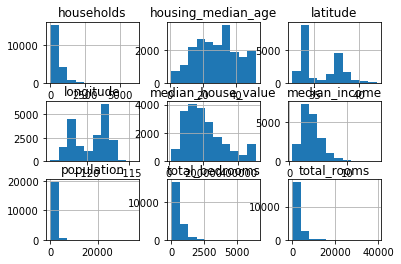

In [40]:
data.hist()
plt.show()         #观察特征的分布

#### 2.将类别型变量编码

In [41]:
for i in data.columns:
    print(f"The column {i}'s dtype is {data.loc[:,i].dtype}")
le = LabelEncoder()
data["ocean_proximity"]=le.fit_transform(data["ocean_proximity"])

The column longitude's dtype is float64
The column latitude's dtype is float64
The column housing_median_age's dtype is float64
The column total_rooms's dtype is float64
The column total_bedrooms's dtype is float64
The column population's dtype is float64
The column households's dtype is float64
The column median_income's dtype is float64
The column median_house_value's dtype is float64
The column ocean_proximity's dtype is object


#### 3.添加一列值1，构造X矩阵

In [43]:
data.insert(0, 'x0', np.ones(data.shape[0]))

#### 4.分离X,Y

In [44]:
Y=np.array(data['median_house_value'])
X=data.drop('median_house_value',axis=1)
X.head(5)

,x0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,1.0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,1.0,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,1.0,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,1.0,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,1.0,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3


#### 5.分割测试集和训练集

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=1)        #训练集数据集分离
y_train

array([ 93200.,  89500., 275000., ..., 500001.,  91200., 126000.])

---
## 正规方程

#### 1.代入求解的公式：w=(X.T*X).I*X.T*y;

In [46]:
xtx=np.dot(X_train.T,X_train)
if np.linalg.det(xtx)==0:               #如果秩为0则不可逆
    print("error")
I=np.linalg.inv(xtx)                     #逆矩阵
w=I.dot(X_train.T).dot(y_train)          #代入公式
w

array([-3.57273871e+06, -4.25875459e+04, -4.23670143e+04,  1.16048187e+03,
       -7.71847754e+00,  1.10769457e+02, -3.75909118e+01,  4.57131402e+01,
        4.00752735e+04,  8.94659193e+01])

#### 2.预测

In [47]:
from  sklearn.metrics import r2_score
y_predict1=np.dot(X_test,w)                 #预测结果
df=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_predict1)],1)
df.columns=["实际值","预测值"]
display(df)                                #输出

,实际值,预测值
0,360900.0,376219.942831
1,291500.0,273522.548090
2,131300.0,146884.054268
3,500001.0,357301.698624
4,118800.0,30134.778011
5,189600.0,237618.784910
6,162500.0,181341.732182
7,134700.0,69122.433373
8,192200.0,231408.865845
9,179400.0,135063.916273


#### R2评估

In [48]:
#计算误差
print("线性回归闭合形式的R2为：",r2_score(y_test,y_predict1))

线性回归闭合形式的R2为： 0.6490233623604122


##### 可以看到决定系数约为0.65，拟合效果一般

---
## 随机梯度下降

#### 1.标准差均值归一

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()                           #实例化一个归一器
Xs_train=scaler.fit_transform(X_train)            #x训练集的归一化
Xs_test=scaler.fit_transform(X_test)              #X测试集归一
ys_train=((y_train.T-y_train.T.mean())/y_train.T.std()).T#y训练集的归一化(因为ys_train为array类型，这个手动计算容易些)

#### 2.随机梯度下降

In [50]:
w1=np.random.rand(10)                          #参数随机初始
a=0.005                                       #学习率
for i in range(Xs_train.shape[0]):            #遍历样本
    loss=ys_train[i]-np.dot(w1.T,Xs_train[i]) 
    for j in range(Xs_train.shape[1]):        #every 特征
        w1[j]=w1[j]+a*loss*Xs_train[i,j]      #梯度下降
w1

array([ 0.4067854 , -0.72985514, -0.75805798,  0.0533616 , -0.13144231,
        0.37163873, -0.35704482,  0.15863022,  0.62921042, -0.02997193])

#### 3.预测

In [51]:
ys_predict=np.dot(Xs_test,w1)                 #预测
#y_predict2=ys_predict*(y_train.max()-y_train.min())+y_train.min()#反归一化
y_predict2=ys_predict*y_test.std()+y_test.mean()#反归一化
df=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_predict2)],1)
df.columns=["实际值","预测值"]
df

,实际值,预测值
0,360900.0,364313.044415
1,291500.0,266543.122737
2,131300.0,162931.675911
3,500001.0,352566.076890
4,118800.0,45525.985586
5,189600.0,228830.934742
6,162500.0,180981.718603
7,134700.0,81312.260404
8,192200.0,232474.480040
9,179400.0,151218.064135


#### 评估

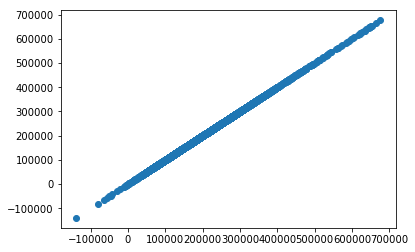

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_predict2,y_predict2)
plt.show()

In [53]:
print("随机梯度下降的R2决定系数为：",r2_score(y_test,y_predict2))

随机梯度下降的R2决定系数为： 0.6414430240117825


---
### 批量梯度下降

In [54]:
w2=np.random.rand(10)
a=0.00005
for iter in range(200):
    for j in range(X_train.shape[1]):
        sum=0
        for i in range(X_train.shape[0]):
            sum=sum+(ys_train[i]-np.dot(w2.T,Xs_train[i]))*Xs_train[i,j] 
        w2[j]=w2[j]+a*sum

#### 预测

In [55]:
ys_predict=np.dot(Xs_test,w2)                 #预测
y_predict3=ys_predict*y_test.std()+y_test.mean()#反归一化
df=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_predict3)],1)
df.columns=["实际值","预测值"]
df

,实际值,预测值
0,360900.0,375157.501166
1,291500.0,273353.082491
2,131300.0,147748.248206
3,500001.0,357594.384128
4,118800.0,28185.911132
5,189600.0,237657.948853
6,162500.0,183193.646224
7,134700.0,67205.649101
8,192200.0,231604.537233
9,179400.0,133171.504814


#### 3 评估

In [56]:
print("LMS的R2决定系数为：",r2_score(y_test,y_predict3))

LMS的R2决定系数为： 0.6490678762731432
